# Image preprocessing

Preprocess images to format ready for training and save them with targets (prices)

In [1]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
from PIL import Image, ImageOps
from pathlib import Path

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

### Setup

In [8]:
def display_car_price(X, y):
    num_images = 12
    
    plt.figure(figsize=(15, 5))
    for i, (img, price) in enumerate(zip(X[:num_images], y[:num_images])):
        ax = plt.subplot(2, 6, i + 1)    
        ax.imshow(img[:, :, 0], cmap='gray')
        ax.set_title(price)
        ax.axis('off')

In [2]:
# All images first resized to 'mid_size' without distortions
mid_size = (250, 380)
# than resized to 'final_size' with distortions
final_size = (128, 128)

csv_path = '../datasets/autoria/autoria_clean_data.csv'
df = pd.read_csv(csv_path)


def process_path(path):
    img = get_image(path)
    price = get_price(path)
    return img, price

def get_image(path):
    img = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, mid_size)
    img = tf.image.resize(img, final_size)
    
    return img.numpy().astype(np.uint8)

def get_price(path):
    car_id = path.name.split('_', 1)[0]
    car_id = int(car_id)

    price = df.loc[df['id'] == car_id, 'price_USD'].values[0]
    
    return price

### Save image-price 100k (128, 128, 1) with numpy

In [3]:
img_dir = Path('../datasets/autoria/images')
img_paths = list(img_dir.iterdir())

save_path = '../datasets/autoria/ready/image_price_128_gray_int_100k.npz'

NUM = 100_000

In [4]:
start = time.perf_counter()

X = []
y = []
counter = 1
for path in img_paths[:NUM]:
    img, price = process_path(path)
    X.append(img)
    y.append(price)
    
    if counter % 100 == 0:
        print('Done:', counter, end='\r')
    counter += 1
    
X = np.stack(X)
y = np.stack(y)

np.savez_compressed(save_path, X=X, y=y)
    
end = time.perf_counter()
print()
print(f'Time to read, process, save {NUM} images: {end - start:.2f} seconds')

Done: 100000
Time to read, process, save 100000 images: 1090.01 seconds


In [5]:
X.shape, y.shape

((100000, 128, 128, 1), (100000,))

#### Test reading saved file

In [6]:
data = np.load(save_path)

In [7]:
X = data['X']
y = data['y']

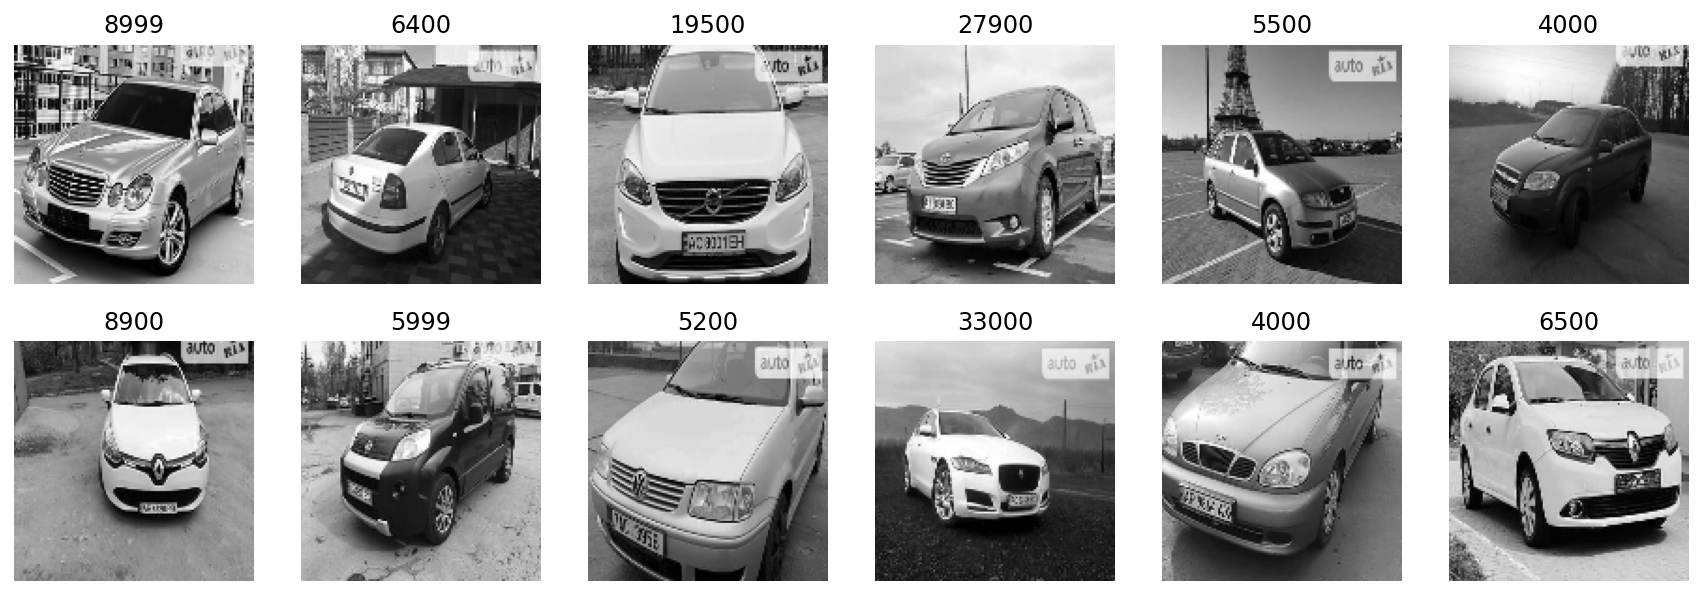

In [9]:
display_car_price(X, y)